# ESA Data Analysis


### Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set(rc = {'figure.figsize':(15,8)}, color_codes=True)

## 2017 Expenditures Data

In [78]:
expend2017_df = pd.read_csv('esa_expenditures2017.csv')
expend2017_df = expend2017_df[['Group','Status','Scientific Name',
                 'Inverted Common Name','FWS 2017','Other Fed 2017',
                            'States 2017','Total 2017','Area']]
expend2017_df.head()

,Group,Status,Scientific Name,Inverted Common Name,FWS 2017,Other Fed 2017,States 2017,Total 2017,Area
0,Amphibians,E,arroyo southwestern,"Toad, arroyo",245087,375272,0,620359,NaN
1,Amphibians,T,Ambystoma californiense,"Salamander, California tiger",737957,1052249,0,1790206,U.S.A.
2,Amphibians,E,Ambystoma californiense,"Salamander, California tiger",570447,52156,0,622603,U.S.A.
3,Amphibians,E,Ambystoma californiense,"Salamander, California tiger",541608,100600,0,642208,U.S.A.
4,Amphibians,E,Eurycea sosorum,"Salamander, Barton Springs",15000,300,0,15300,Wherever found


Let's take a look at the funding distribution per group:

Text(0.5, 1.0, 'FY 2017 Total Funding in USD per Group')

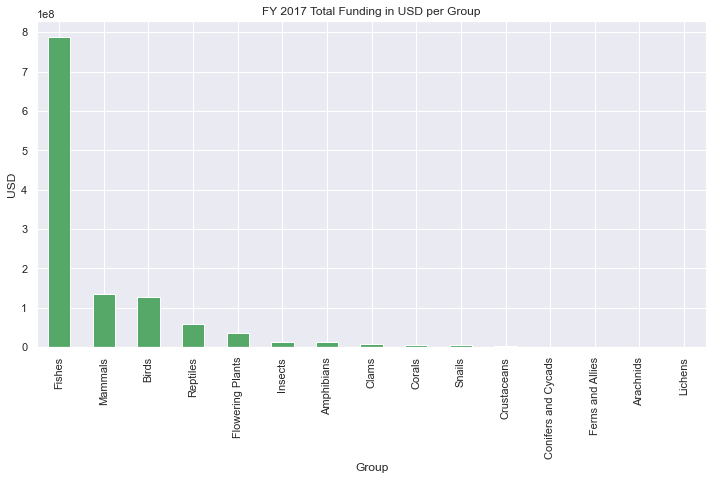

In [87]:
#barplot of the total funding received by each group
plt.figure(figsize = (12,6))
expend2017_df.groupby('Group')['Total 2017'].sum().sort_values(ascending=False).plot.bar(color = 'g')
plt.xlabel('Group')
plt.ylabel('USD')
plt.title('FY 2017 Total Funding in USD per Group')

Now let's take a look at the top 10 funded species populations:

In [79]:
_2017top_10 = expend2017_df.sort_values(by="Total 2017", ascending=False).head(10)

<AxesSubplot:xlabel='Inverted Common Name'>

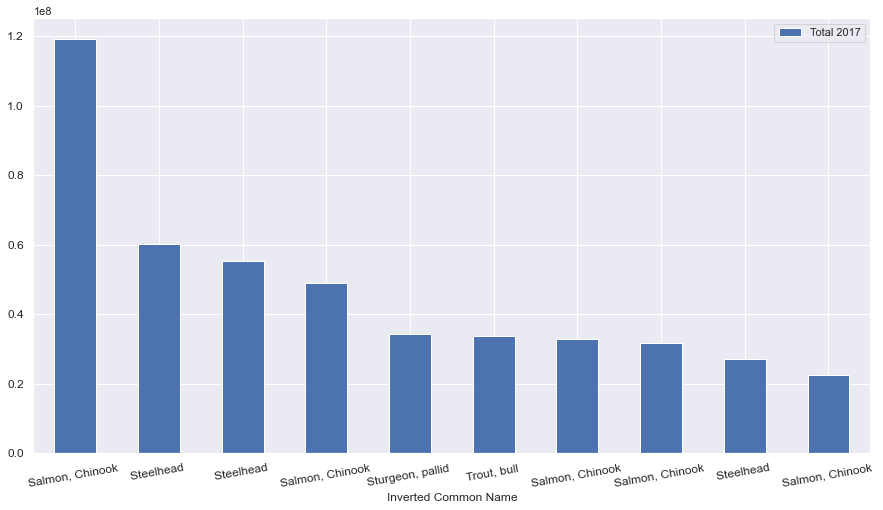

In [73]:
_2017top_10.plot(x="Inverted Common Name", y="Total 2017", kind="bar", rot=10, fontsize=12)

The top 10 most funded species populations account for only 4 species...
All of which are in the Fishes Group in 2017.

<AxesSubplot:xlabel='Inverted Common Name', ylabel='count'>

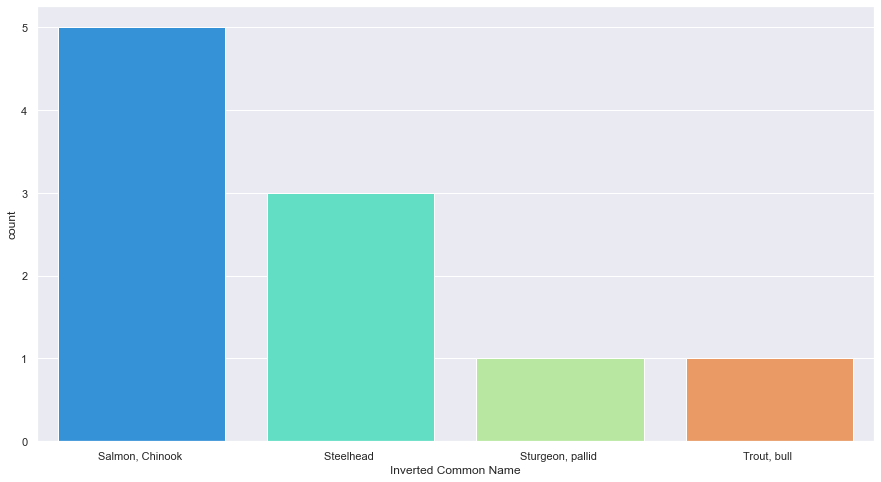

In [77]:
sns.countplot(x="Inverted Common Name", data=_2017top_10, palette="rainbow")

## 2018 Expenditures Data

In [80]:
expend2018_df = pd.read_csv('esa_expenditures2018.csv')
expend2018_df = expend2018_df[['Group','Status','Scientific Name',
                                'Inverted Common Name','FWS 2018',
                               'Other Fed 2018','States 2018',
                               'Total 2018','Area']]
expend2018_df.head()

,Group,Status,Scientific Name,Inverted Common Name,FWS 2018,Other Fed 2018,States 2018,Total 2018,Area
0,Amphibians,T,Peltophryne lemur,"Toad, Puerto Rican crested",5000,142491,0,147491,Wherever found
1,Amphibians,E,Bufo hemiophrys baxteri,"Toad, Wyoming",331300,14500,15251,361051,Wherever found
2,Amphibians,E,Rana muscosa,"Frog, mountain yellow-legged",76115,60706,0,136821,Southern California DPS
3,Amphibians,E,Bufo houstonensis,"Toad, Houston",111000,132007,4387,247394,Wherever found
4,Amphibians,E,arroyo southwestern,"Toad, arroyo",257341,737609,0,994950,NaN


Let's take a look at the funding distribution per group:

In [102]:
expend_df.groupby('Group')['Total 2018'].sum().sort_values(ascending=False)

Group
Fishes                 4.440573e+09
Birds                  1.587444e+08
Mammals                1.005443e+08
Reptiles               5.496528e+07
Flowering Plants       2.767444e+07
Amphibians             1.464664e+07
Insects                1.301669e+07
Clams                  7.854041e+06
Snails                 5.250602e+06
Crustaceans            3.325229e+06
Corals                 1.863272e+06
Ferns and Allies       5.630130e+05
Conifers and Cycads    2.532240e+05
Arachnids              9.100200e+04
Lichens                4.140000e+04
Name: Total 2018, dtype: float64

Text(0.5, 1.0, 'FY 2018 Total Funding in USD per Group')

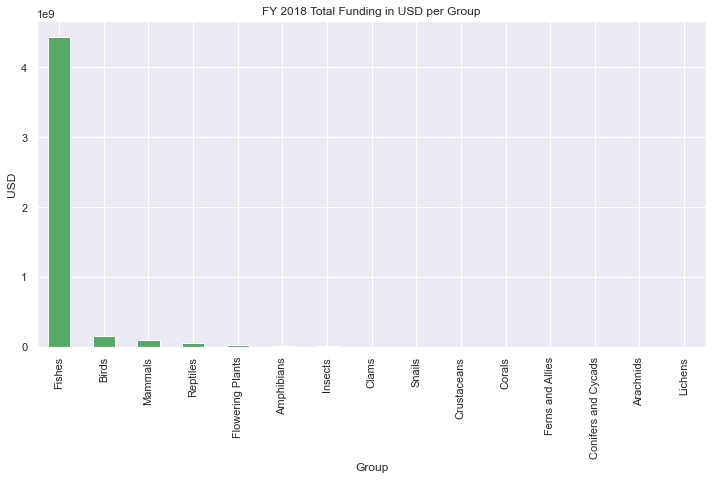

In [85]:
#barplot of the total funding received by each group
plt.figure(figsize = (12,6))
expend_df.groupby('Group')['Total 2018'].sum().sort_values(ascending=False).plot.bar(color = 'g')
plt.xlabel('Group')
plt.ylabel('USD')
plt.title('FY 2018 Total Funding in USD per Group')

From the above graph, it is clear that the funding is unevenly distributed, with the Fishes group receiving the majority of total funding

In [81]:
_2018top_10 = expend2018_df.sort_values(by="Total 2018", ascending=False).head(10)

<AxesSubplot:xlabel='Inverted Common Name'>

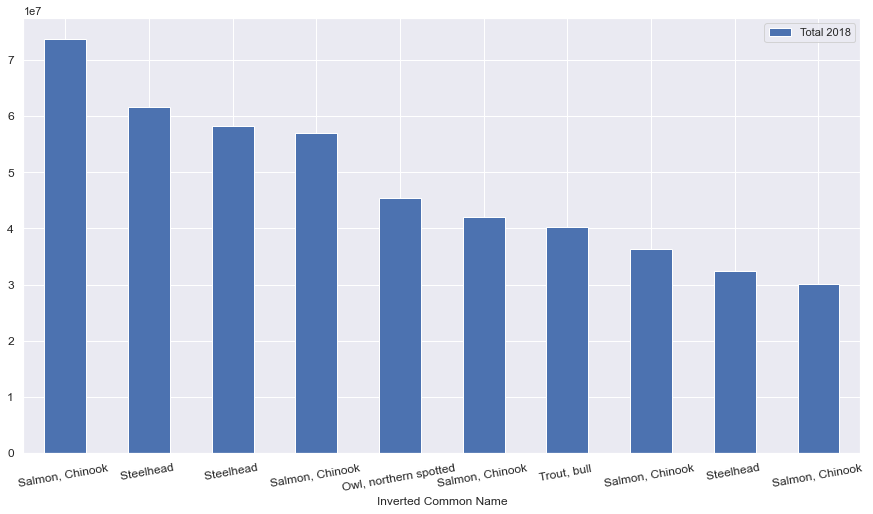

In [89]:
_2018top_10.plot(x="Inverted Common Name", y="Total 2018", kind="bar", rot=10, fontsize=12)

The top 10 most funded species populations account for only 4 species...
3 of which are in the Fishes Group in 2018.

<AxesSubplot:xlabel='Inverted Common Name', ylabel='count'>

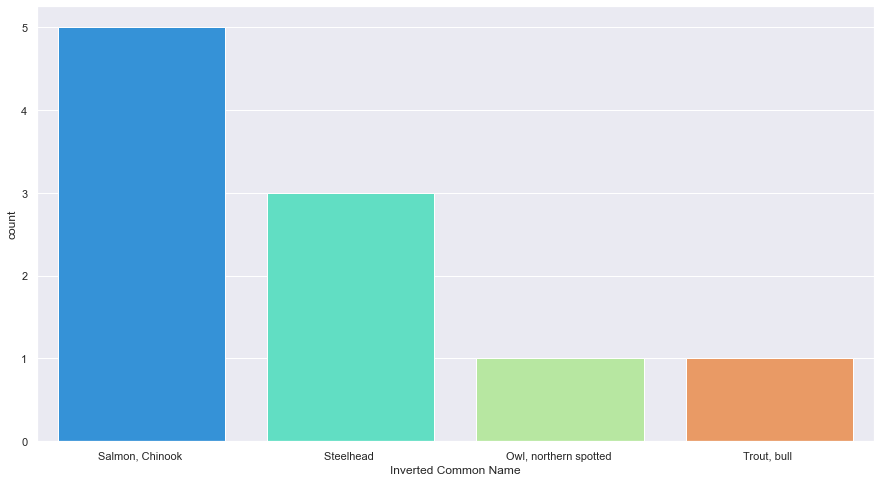

In [82]:
sns.countplot(x="Inverted Common Name", data=_2018top_10, palette="rainbow")

## Merged Expenditures Data

In [46]:
expend_df = expend2018_df.merge(expend2017_df, how="inner", 
                 on=['Group','Scientific Name','Inverted Common Name','Status','Area'])

In [83]:
# Stats for combined FY 2017 - 2018
expend_df.describe()

,FWS 2018,Other Fed 2018,States 2018,Total 2018,FWS 2017,Other Fed 2017,States 2017,Total 2017
count,1.710000e+03,1.710000e+03,1.710000e+03,1.710000e+03,1.710000e+03,1.710000e+03,1.710000e+03,1.710000e+03
mean,9.058134e+04,2.334019e+06,3.996140e+05,2.824214e+06,1.042400e+05,2.505335e+06,8.282730e+04,2.691927e+06
std,3.000434e+05,8.559222e+06,4.091161e+06,1.007234e+07,3.656579e+05,1.077552e+07,4.190183e+05,1.099588e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
25%,5.000000e+03,0.000000e+00,0.000000e+00,7.838500e+03,4.731500e+03,0.000000e+00,0.000000e+00,9.432750e+03
50%,1.009800e+04,3.041000e+03,0.000000e+00,2.340550e+04,1.067000e+04,4.750000e+03,0.000000e+00,2.894800e+04
75%,5.637500e+04,6.437500e+04,0.000000e+00,2.099945e+05,5.082025e+04,1.267875e+05,7.000000e+02,2.340890e+05
max,5.946849e+06,5.963197e+07,6.306780e+07,7.382530e+07,6.610558e+06,1.179275e+08,5.428723e+06,1.192271e+08


<AxesSubplot:xlabel='count', ylabel='Group'>

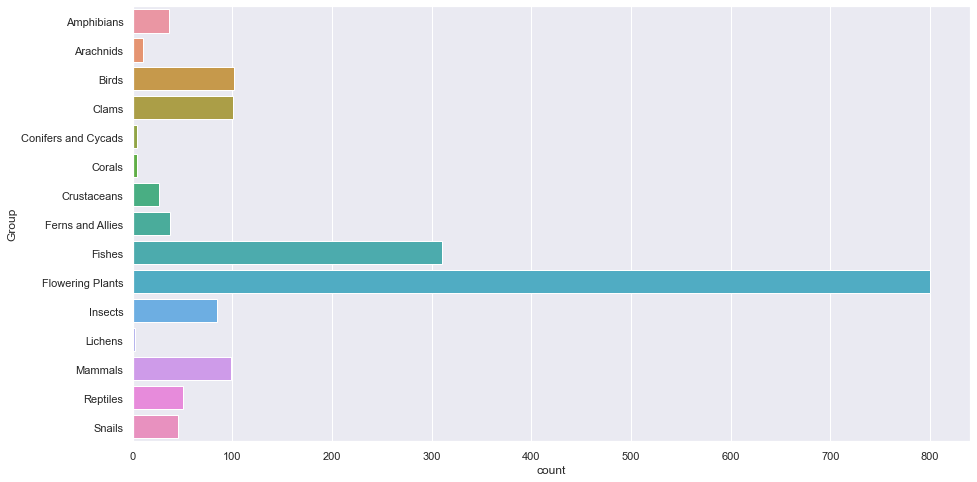

In [84]:
# Count totals for each species group
sns.countplot(data = expend_df, y = 'Group')

<AxesSubplot:xlabel='Status', ylabel='count'>

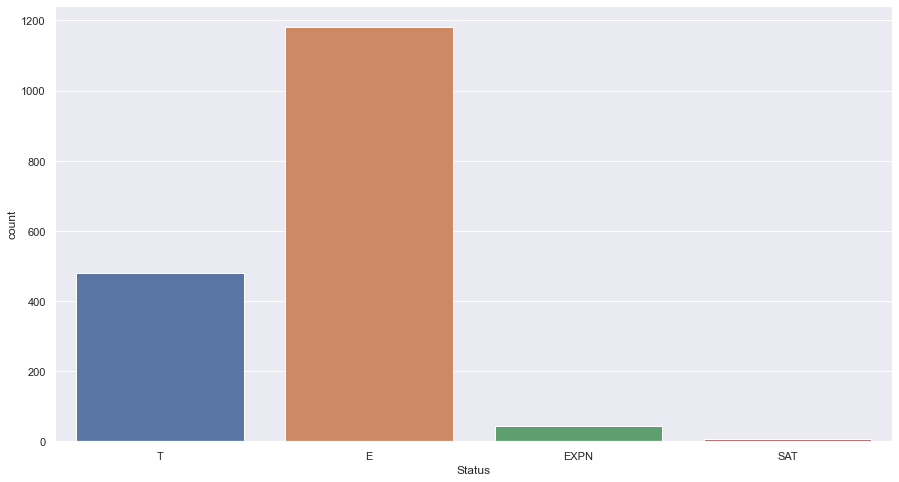

In [51]:
sns.countplot(data = expend_df, x = 'Status')

## ESA Species Data

In [23]:
species_df = pd.read_csv('esa_species.csv')
print(species_df.shape)
print(species_df.columns)
species_df = species_df[['Group','Status','Scientific Name',
                         'Common Name','Location','Status Category',
                        'Listing Date','Inverted Common Name','Area']]       
species_df.head()

(10318, 9)
Index(['Common Name', 'Scientific Name', 'Status', 'Area', 'Listing Date',
       'Location', 'Inverted Common Name', 'Group', 'Status Category'],
      dtype='object')


,Group,Status,Scientific Name,Common Name,Location,Status Category,Listing Date,Inverted Common Name,Area
0,Algae,E,Isogomphodon oxyrhynchus,Daggernose Shark,Foreign,Listed,NaN,"Shark, Daggernose",NaN
1,Amphibians,UR,Desmognathus abditus,Cumberland Dusky salamander,Domestic,"Petitioned for Listing, Under Review",NaN,"salamander, Cumberland Dusky",Wherever found
2,Amphibians,SC,Plethodon elongatus,Del Norte salamander,Domestic,Not Listed,NaN,"Salamander, Del Norte",Wherever found
3,Amphibians,SC,Eurycea aquatica,Dark-sided salamander,Domestic,Not Listed,NaN,"Salamander, dark-sided",Wherever found
4,Amphibians,RT,Bufo retiformis,Sonoran green toad,Both Domestic and Foreign,Not Listed,NaN,"Toad, Sonoran green",Wherever found


After ordering the data according to group, I noticed an error.
At index 0, the Daggernose Shark is listed in the Algae Group.

In [97]:
#Dropping the the row due to error in data
species_df = species_df.drop(index=[0])

There could be further errors in the data that I did not find during data cleaning

<AxesSubplot:xlabel='count', ylabel='Group'>

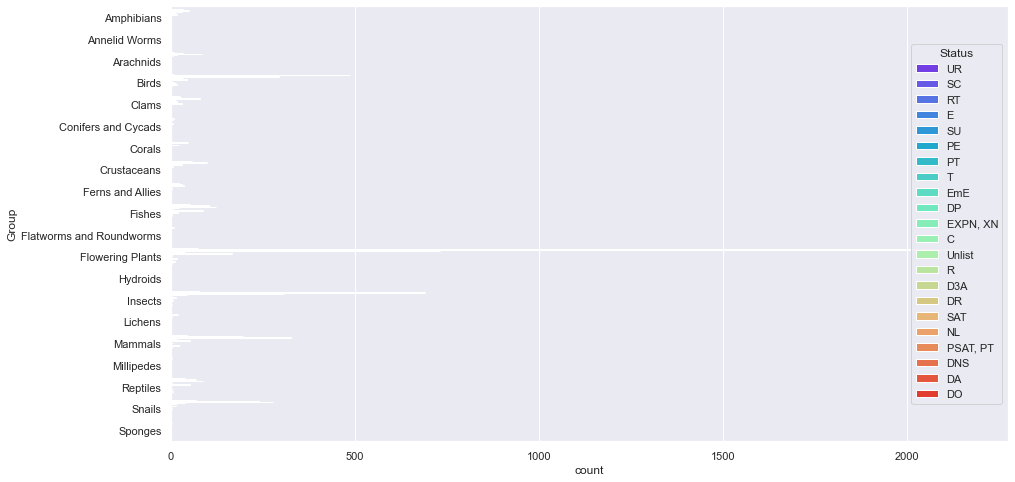

In [100]:
# sns.countplot(y="Group", hue="Status", data=species_df, palette="rainbow")

## ESA Recovery Plans Data

In [22]:
plans_df = pd.read_csv('esa_recovery_plans.csv')
print(plans_df.shape)
print(plans_df.columns)
plans_df = plans_df[['Group','Status','Scientific Name',
                    'Common Name','Recovery Actions',
                    'Recovery Document Date','Region','Area']]  
plans_df.head()

(1788, 8)
Index(['Common Name', 'Scientific Name', 'Area', 'Group',
       'Recovery Document Date', 'Status', 'Region', 'Recovery Actions'],
      dtype='object')


,Group,Status,Scientific Name,Common Name,Recovery Actions,Recovery Document Date,Region,Area
0,Mammals,E,Myotis sodalis,Indiana bat,116.0,2007-04-16,Great Lakes-Big Rivers Region,Wherever found
1,Mammals,T,Ursus arctos horribilis,Grizzly bear,329.0,1993-09-10,Mountain-Prairie Region,"U.S.A., conterminous (lower 48) States, except..."
2,Mammals,T,Odocoileus virginianus leucurus,Columbian white-tailed deer,14.0,1983-06-14,Pacific Region,Columbia River DPS
3,Mammals,E,Mustela nigripes,Black-footed ferret,84.0,2013-12-23,Mountain-Prairie Region,"Wherever found, except where listed as an expe..."
4,Mammals,E,Vulpes macrotis mutica,San Joaquin kit fox,84.0,1998-09-30,California/Nevada Region,wherever found


Let's take a look at the regional distribution of species:

<AxesSubplot:xlabel='count', ylabel='Region'>

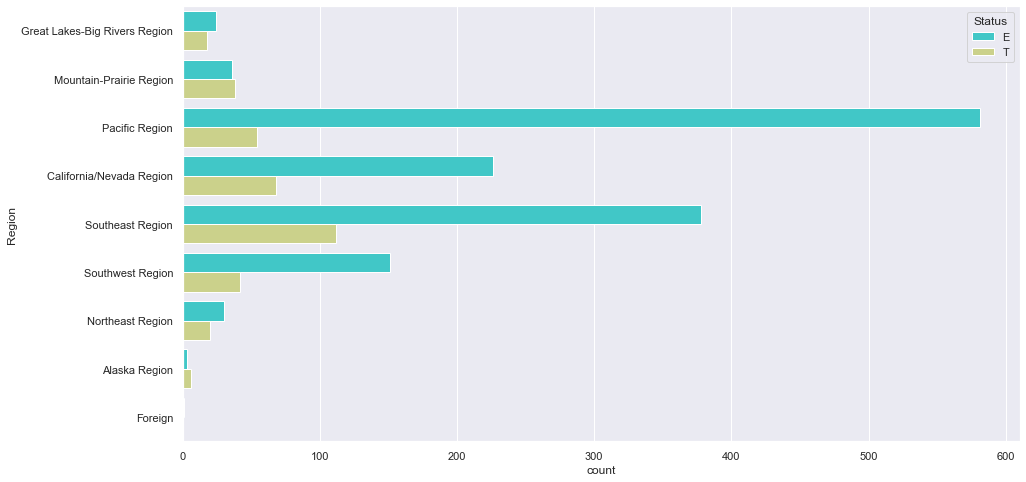

In [99]:
sns.countplot(y="Region", hue="Status", data=plans_df, palette="rainbow")

Note: There more recovery plans for endangered species in all regions except Alaska and the Mountain-Prairie Region.

What is the status distribution per group?

<AxesSubplot:xlabel='count', ylabel='Group'>

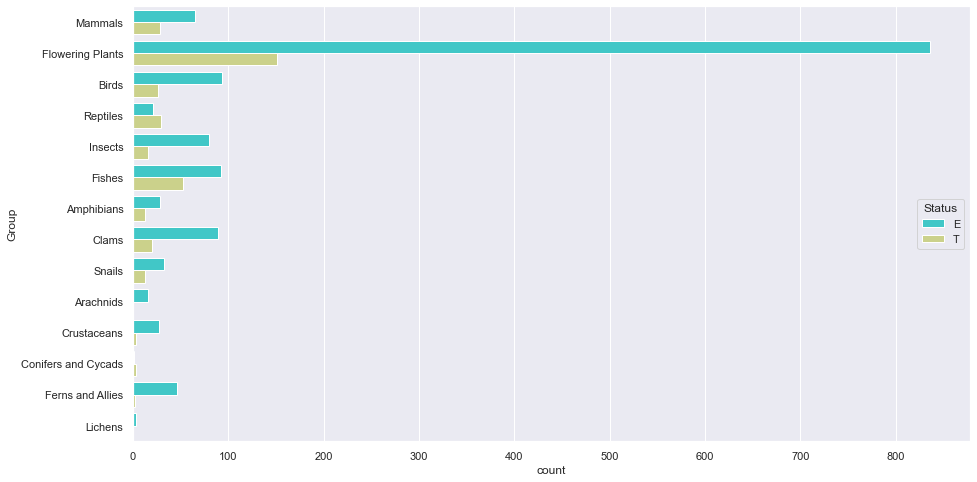

In [101]:
sns.countplot(y="Group", hue="Status", data=plans_df, palette="rainbow")

Note: Flowering Plants have more endangered species than any other group

## Merged Species and Plans Data

In [44]:
species_df.merge(plans_df, how="inner", 
                 on=['Common Name','Scientific Name','Status','Group','Area'])

,Group,Status,Scientific Name,Common Name,Location,Status Category,Listing Date,Inverted Common Name,Area,Recovery Actions,Recovery Document Date,Region
0,Amphibians,E,Ambystoma mavortium stebbinsi,Sonoran tiger salamander,Both Domestic and Foreign,Listed,1997-01-06,"Salamander, Sonoran tiger",Wherever found,38.0,2019-12-06,Southwest Region
1,Amphibians,E,Ambystoma mavortium stebbinsi,Sonoran tiger salamander,Both Domestic and Foreign,Listed,1997-01-06,"Salamander, Sonoran tiger",Wherever found,38.0,2002-09-24,Southwest Region
2,Amphibians,E,Batrachoseps aridus,Desert slender salamander,Domestic,Listed,1973-06-04,"Salamander, desert slender",Wherever found,37.0,1982-08-12,California/Nevada Region
3,Amphibians,E,Batrachoseps aridus,Desert slender salamander,Domestic,Listed,1973-06-04,"Salamander, desert slender",Wherever found,37.0,2019-09-13,California/Nevada Region
4,Amphibians,T,Eurycea nana,San Marcos salamander,Domestic,Listed,1980-07-14,"Salamander, San Marcos",Wherever found,33.0,1996-02-14,Southwest Region
...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Snails,E,Lanx sp.,Banbury Springs limpet,Domestic,Listed,1992-12-14,"Limpet, Banbury Springs",Wherever found,36.0,1995-11-26,Pacific Region
1741,Snails,T,Elimia crenatella,Lacy elimia (snail),Domestic,Listed,1998-10-28,"Elimia, lacy (snail)",Wherever found,28.0,2005-12-02,Southeast Region
1742,Snails,E,Physa natricina,Snake River physa snail,Domestic,Listed,1992-12-14,"Snail, Snake River physa",Wherever found,33.0,1995-11-26,Pacific Region
1743,Snails,E,Ostodes strigatus,Snail [no common name],Domestic,Listed,2016-10-24,[no common name] Snail,Wherever found,NaN,2021-11-10,Pacific Region


I attempted to merge expenditures data with ESA recovery plans data to see if there was a relationship between funding and recovery actions.
I was surprised to find that the result produced only 1 row...

In [90]:
expend2018_df.merge(plans_df, how="inner", 
                 on=['Group','Scientific Name', 'Status', 'Area'])

,Group,Status,Scientific Name,Inverted Common Name,FWS 2018,Other Fed 2018,States 2018,Total 2018,Area,Common Name,Recovery Actions,Recovery Document Date,Region
0,Flowering Plants,E,Scirpus ancistrochaetus,"Bulrush, Northeastern",75395,13440,8038,96873,NaN,Northeastern bulrush,35.0,1993-08-25,Northeast Region


Only 1 row in common with the current FWS species data

In [96]:
expend2018_df.merge(species_df, how="inner", 
                 on=['Group','Scientific Name', 'Status', 'Area'])

,Group,Status,Scientific Name,Inverted Common Name_x,FWS 2018,Other Fed 2018,States 2018,Total 2018,Area,Common Name,Location,Status Category,Listing Date,Inverted Common Name_y
0,Flowering Plants,E,Scirpus ancistrochaetus,"Bulrush, Northeastern",75395,13440,8038,96873,NaN,Northeastern bulrush,Domestic,Listed,1991-05-07,"Bulrush, Northeastern"


No rows in common for the 2017 data...

In [94]:
expend2017_df.merge(plans_df, how="inner", 
                 on=['Group','Scientific Name', 'Status', 'Area'])

,Group,Status,Scientific Name,Inverted Common Name,FWS 2017,Other Fed 2017,States 2017,Total 2017,Area,Common Name,Recovery Actions,Recovery Document Date,Region


Only 1 row in common with the current FWS species data

In [95]:
expend2017_df.merge(species_df, how="inner", 
                 on=['Group','Scientific Name', 'Status', 'Area'])

,Group,Status,Scientific Name,Inverted Common Name_x,FWS 2017,Other Fed 2017,States 2017,Total 2017,Area,Common Name,Location,Status Category,Listing Date,Inverted Common Name_y
0,Fishes,T,Epinephelus striatus,"Grouper, Nassau",0,464945,0,464945,NaN,Nassau grouper,Both Domestic and Foreign,Listed,2016-07-29,"grouper, Nassau"
